# Image Noise Reduction with Autoencoders using Tensor Flow

**Objective** - We will create 2 neural network model in this project:

1. To train the model from handwritten digit from mnist dataset.

2. To denoise input data(this is autoencoder). In our dataset, there is no noisy data. So, firstly we will add noisy data in Task 3 and then denoise our data. 

___
## Task 1: Introduction and Importing Libraries


**Autoencoding** is a type of artifical neural network which helps to reduce the dimensionality of data by training the network for denoising(to ignore signal noise).

In [0]:
import numpy as np

from tensorflow.keras.datasets import mnist
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, LambdaCallback
from tensorflow.keras.utils import to_categorical

%matplotlib inline

## Task 2: Data Preprocessing

For this project, we are using the popular MNIST data-set. This data-set has 60,000 examples of images of handwritten digits in the training set and 10,000 examples in the test set. The examples are black and white images of 28x28. As in, 28 rows and 28 columns for each example. The labels are simply digits corresponding to the 10 classes from 0 to 9. We will create two neural network models in this project - one will be trained to perform classification of these handwritten digits. And another model will be used to de-noise input data. This is our Auto-encoder. Eventually, we will connect the two models together and have them work in conjunction as a single, composite model. In order to input the examples to our two models, we will do a little bit of processing on them.

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
# our values are from range 0-255

# now bring these values in range(0,1) i.e plain normalisation. This is not good an approach as the data must be from 0 and we should know the highest value
# else normalisation can be done using mean and standard deviation
X_train = X_train.astype('float')/255
X_test = X_test.astype('float')/255

# reshaping from (60000, (28,28)) to (60000, 784)
X_train = np.reshape(X_train, (60000, 784))
X_test = np.reshape(X_test, (10000, 784))

11493376/11490434 [==============================] - 0s 0us/step


## Task 3: Adding Noise

**Objective** - To add artifical noisy data in our dataset. 

We are artificially adding some noise to our training and test examples. You may wonder - why synthesize the noise to train the Auto-encoder? This is because in real world applications, while we will often get noisy data, we will not have the corresponding _clean_ labels. Instead, when we synthesize noise on already clean images, we can train an Auto-encoder to focus on the important parts of the images and then when it's applied to real world noisy data, it knows where to focus and which features to retain.

In [3]:
# this cell is just for understanding
noisyy = np.random.rand(60000, 784)
noisyyy = noisyy * 0.9   # to ensure that value do not become tooo big or tooo small
print("noisyy:", noisyy)
print("\nnoisyy shape :", noisyy.shape)
print("\nnoisyyy:", noisyyy)

noisyy: [[0.91603285 0.61757283 0.90489788 ... 0.45769507 0.61660547 0.56105992]
 [0.77296152 0.95774622 0.4442438  ... 0.50406748 0.00679995 0.82791642]
 [0.0429411  0.46891103 0.26275187 ... 0.20639758 0.26182046 0.39843877]
 ...
 [0.5605157  0.28110201 0.79323912 ... 0.81259329 0.79593209 0.72910137]
 [0.82269423 0.82109323 0.21975269 ... 0.31994867 0.68365491 0.83732513]
 [0.93607239 0.34733881 0.87727141 ... 0.30067774 0.30747545 0.96885381]]

noisyy shape : (60000, 784)

noisyyy: [[0.82442956 0.55581555 0.8144081  ... 0.41192556 0.55494492 0.50495393]
 [0.69566537 0.8619716  0.39981942 ... 0.45366074 0.00611995 0.74512478]
 [0.03864699 0.42201992 0.23647668 ... 0.18575783 0.23563842 0.35859489]
 ...
 [0.50446413 0.25299181 0.7139152  ... 0.73133396 0.71633888 0.65619124]
 [0.7404248  0.73898391 0.19777742 ... 0.2879538  0.61528942 0.75359262]
 [0.84246515 0.31260493 0.78954427 ... 0.27060997 0.2767279  0.87196843]]


\>>>a = np.arange(10)

\>>>np.clip(a, 1, 8)

array([1, 1, 2, 3, 4, 5, 6, 7, 8, 8])

\>>>a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

\>>>np.clip(a, 3, 6, out=a)

array([3, 3, 3, 3, 4, 5, 6, 6, 6, 6])

\>>>a = np.arange(10)

\>>>a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

/>>>np.clip(a, [3, 4, 1, 1, 1, 4, 4, 4, 4, 4], 8)

array([3, 4, 2, 3, 4, 5, 6, 7, 8, 8])

In [4]:
# random.rand - It will give random values in range (0,1)
X_train_noisy = X_train + np.random.rand(60000, 784)*0.9
X_test_noisy = X_test + np.random.rand(10000, 784)*0.9  

# to ensure that our data remains in range(0,1)
# 0. means there are going to be floating values.
# numpy. clip() function is used to Clip (limit) the values in an array.
# np.clip(X_train_noisy, 0., 1.) - value smaller than 0 will become 0 and graeter than 1 will become 1 
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
np.clip(X_test_noisy, 0., 1.,out=X_test_noisy)

array([[0.63291843, 0.32792804, 0.69827364, ..., 0.25816329, 0.76736251,
        0.03338416],
       [0.63546397, 0.40431771, 0.45198337, ..., 0.75527213, 0.82354388,
        0.68722546],
       [0.31428008, 0.86376695, 0.38374472, ..., 0.05825698, 0.43570354,
        0.76659363],
       ...,
       [0.08666658, 0.17689613, 0.09117555, ..., 0.08266341, 0.10044734,
        0.22608166],
       [0.67258954, 0.84086113, 0.13422443, ..., 0.3220944 , 0.52996549,
        0.76708107],
       [0.24477464, 0.54295529, 0.24602905, ..., 0.25274153, 0.06455369,
        0.22174068]])

**Difference between imshow() and show()** - 

1. show() - It is used to show images but do not store images.

2. imshow() - It is used to store images but not used to show images.

**Difference between xlabels() and xticks()** - 

1. xlabels() - will display label of x-coordinate. For eg - year

2. xticks() - will display specific points on x-coordinate. For eg - 2000, 2001, 20002,....


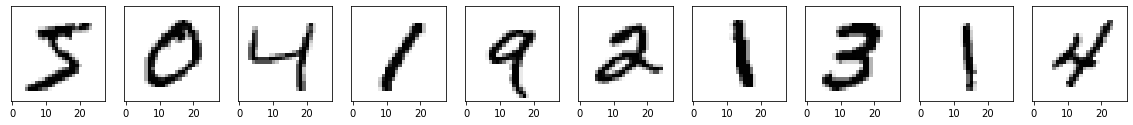

In [5]:
# here we will show what happens when data is noisy
# p - predictions 
def plot(x, p, labels=False):
  plt.figure(figsize=(20, 2))
  # we are taking 10 images at a time 
  for i in range(10):
    plt.subplot(1, 10, i+1) # 1 row, 10 column, i+1 - index of image which starts from 1 always
    plt.imshow(x[i].reshape(28, 28), cmap='binary')
    # plt.xticks([]) # to blank specific points on x-axis
    plt.yticks([]) # to blank specific points on y-axis
    # if predictions have been done 
    if labels:
      plt.xlabel(np.argmax(p[i]))
  plt.show()      

plot(X_train, None)

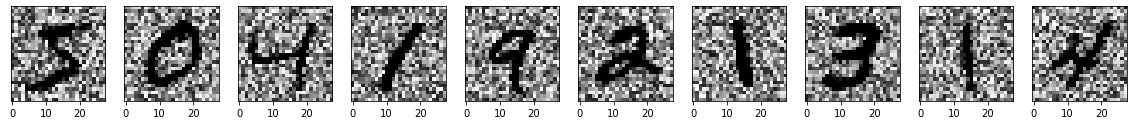

In [6]:
# plot after adding noise to our dataset
plot(X_train_noisy, None)

## Task 4: Building and Training a Classifier

In [7]:
classifier = Sequential([
                         Dense(256, activation='relu', input_shape=(784,)),
                         Dense(256, activation='relu'),
                         Dense(10, activation='softmax')
])

classifier.compile(
    optimizer='adam',
    # if our labels were encoded in onehotencoding then we could use loss='categorical_crossentropy'
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [8]:
# batch_size=512 -> This is done to speed up the training
print(Y_train.shape)
# training model for 3 epochs 
classifier.fit(X_train, Y_train, batch_size=512, epochs=3) # batch size is 512 so it will run for 60000/512 = 118(approx) times

(60000,)
Epoch 1/3
118/118 [==============================] - 2s 15ms/step - loss: 0.4158 - accuracy: 0.8868
Epoch 2/3
118/118 [==============================] - 2s 15ms/step - loss: 0.1515 - accuracy: 0.9556
Epoch 3/3
118/118 [==============================] - 2s 16ms/step - loss: 0.1013 - accuracy: 0.9705


**Without noisy data**

In [9]:
loss, accuracy = classifier.evaluate(X_test, Y_test,batch_size=32) #default batch size = 32. Hence 32*313 is just bigger than 10000 so it ran for 313 cases
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.0984 - accuracy: 0.9714
0.9714000225067139


**With noisy data**

In [10]:
loss_noisy, accuracy_noisy = classifier.evaluate(X_test_noisy, Y_test)
print(accuracy_noisy)

313/313 [==============================] - 0s 2ms/step - loss: 7.6680 - accuracy: 0.2077
0.2076999992132187


**Note - **

1. Our classifier is not working good on noisy data. 

2. Accuracy =  0.2239 - is almost a random guess.

3. To overcome this problem, we will build autoencoder which will denoise our noisy data. 

## Task 5: Building the Autoencoder

If one or more hidden layers in this neural network has lot less nodes as compared to the input and output layer then the training process will force the network to learn a function similar to principal component analysis (eg finding speech in a noisy party) essentially reducing dimensionality. And it will force our model to learn the more important charcteristics from the dataset and focus only on that. 

In [0]:
# we take image with 784 features and reduce the dimensionality and force it to have 64 features and at last expand it again(back to 784 features)
# This way, our auto encoder learns to focus only on the important stuff 
input_image = Input(shape=(784,))
encoded = Dense(64, activation='relu')(input_image) # 64 is taken to reduce the dimensionality
decoded = Dense(784, activation = 'sigmoid')(encoded)

autoencoder = Model(input_image, decoded)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

## Task 6: Training the Autoencoder

By doing this training, our auto encoder will learn to recognize the important features and learn to ignore non-important features. 

1. **Verbose** is an optional argument which can be used to report more information about an operation in your program.

2. **Validation_split**: Float between 0 and 1. Fraction of the training data to be used as validation data.

3. **Batch_size** denotes the subset size of your training sample (e.g. 100 out of 1000) which is going to be used in order to train the network during its learning process.

4. An **Epoch** refers to one cycle through the full training dataset.

In [12]:
# batch_size=512 -> helps to speed up the training process 
autoencoder.fit(
    X_train_noisy, X_train, epochs=100, 
    batch_size=512, validation_split=0.2, verbose=False, 
    callbacks=[
               # if validation loss does not decrease for 5 epochs then our model will stop the training
               EarlyStopping(monitor='val_loss', patience=5),
               # on_epoch_end - means lambda function will call on the end of each epoch 
               LambdaCallback(on_epoch_end=lambda e,l: print('{:.3f}'.format(l['val_loss']), end=' _ '))
    ]
)

print(' _ ')
print("Training is complete!")

0.259 _ 0.231 _ 0.203 _ 0.183 _ 0.172 _ 0.163 _ 0.156 _ 0.149 _ 0.143 _ 0.139 _ 0.135 _ 0.131 _ 0.128 _ 0.125 _ 0.123 _ 0.121 _ 0.119 _ 0.118 _ 0.116 _ 0.114 _ 0.113 _ 0.112 _ 0.112 _ 0.111 _ 0.111 _ 0.110 _ 0.110 _ 0.109 _ 0.109 _ 0.109 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.108 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _ 0.107 _  _ 
Training is complete!


## Task 7: Denoised Images

In [0]:
predictions = autoencoder.predict(X_test_noisy)

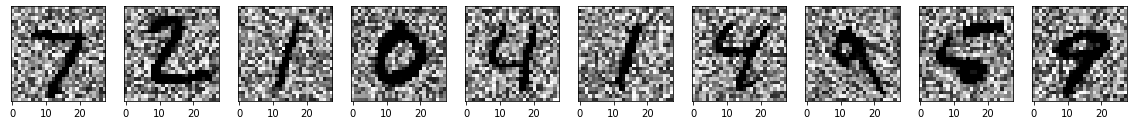

In [14]:
plot(X_test_noisy, None)

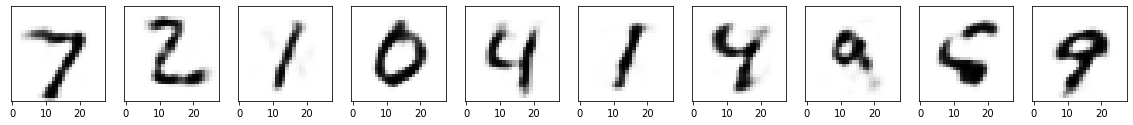

In [15]:
plot(predictions, None)

**Note** - This can be improved more by using convolutional neural network. 

In [16]:
loss, accuracy = classifier.evaluate(X_test_noisy, Y_test)
print("For noisy data - ")
print(accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 7.6680 - accuracy: 0.2077
For noisy data - 
0.2076999992132187


In [17]:
loss, accuracy = classifier.evaluate(predictions, Y_test)
print("For denoised data - ")
print(accuracy)

313/313 [==============================] - 0s 2ms/step - loss: 0.1812 - accuracy: 0.9410
For denoised data - 
0.9409999847412109


## Task 8: Composite Model

In [0]:
input_image = Input(shape=(784,))
x = autoencoder(input_image)   # hopefully x is denoised image 
y = classifier(x)

denoise_and_classify = Model(input_image, y)

In [0]:
predictions = denoise_and_classify.predict(X_test_noisy)

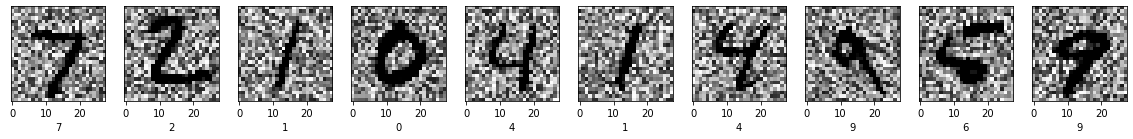

In [20]:
plot(X_test_noisy, predictions, True)

In [21]:
a=to_categorical(Y_test)
print(Y_test[0])
print(a[0])

7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


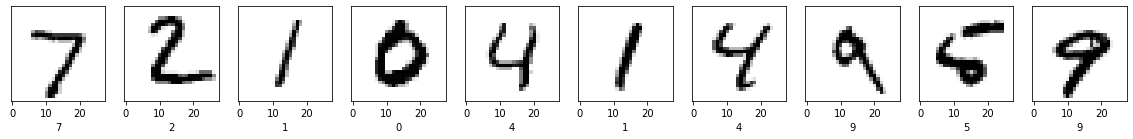

In [22]:
plot(X_test, to_categorical(Y_test), True)